# Utilization of Monte Carlo and Dynamic Programming in Determining Best Course of Treatment in a Tumor Microenvironment

https://github.com/gjaroli/COGS188_group_template

# Group Members
- Kristoffer Alejo
- Garvit Jaroli
- Eric Chun
- Rayan Abu-Hantash

# Abstract
For our project, we aim to develop a simulation of the tumor microenvironment (particularly a Breast Cancer microenvironment) using a Markov Decision Process (MDP) and Monte Carlo simulation to model the immune system's response to cancer with various treatment strategies (i.e. different cytokine-based immunotherapy and also chemotherapy). The data utilized includes mutation rates for BRCA (Breast Cancer), the distribution of different immune cells in the BRCA tumor environment, and also network data showing which cytokines affect which immune cells, and as a result we are able to show how immune cells affect the tumor. This data will be utilized in order to create our own tumor microenvironment where we will be able to initialize our own state space and regulate the state action transitions. By using these different algorithms we hope to identify the best actions for reducing cancer while minimizing damage to the immune system. Success will be measured by the percentage of simulations that are able to successfully reach the desired goal state as that will indicate the effective tumor suppression while also maintaining the immune system together.


# Background
In our study, we plan to create a simulation of a tumor microenvironment, where we aim to analyze the immune system’s response to cancer as well as potential therapies and drug treatments. First we must define what a tumor microenvironment is. As defined by the National Cancer Institute (NIH), they define a tumor microenvironment as “The normal cells, molecules, and blood vessels that surround and feed a tumor cell. A tumor can change its microenvironment, and the microenvironment can affect how a tumor grows and spreads” [<sup>[1]</sup>](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/tumor-microenvironment).

So now we have to ask how we can model the tumor microenvironment? The article “Modelling the Tumour Microenvironment, but What Exactly Do We Mean by Model” answers this question. According to the author Reyes-Aldasoro, “Stochastic models of tumor microenvironments are more common than deterministic ones by an approximate ratio of 10 to 1, which is probably a reflection of the many factors related to cancer, like somatic evolution, which are not deterministic.” [<sup>[2]</sup>](https://pmc.ncbi.nlm.nih.gov/articles/PMC10416922/). Keeping this in mind we can take an MDP approach in modeling our tumor microenvironment as our state transitions are based on probabilities. Now to define our states, we refer back to the same article where they conducted a query to see the frequency of appearances of keywords associated with microenvironments, in order to determine which parameters may be necessary to keep in mind [<sup>[2]</sup>](https://pmc.ncbi.nlm.nih.gov/articles/PMC10416922/). Based on Figure 3 of this article and keeping in mind our limitations for this project, we have identified T cells, Cytokines, and Proliferation as key parameters to keep in mind when designing this model. Now to determine state transitions, the article discusses a series of mathematical models most notably the Malthusian Growth Model and Armitage and Doll Model which can be used to define our state transitions, particularly for cancer cell levels [<sup>[2]</sup>](https://pmc.ncbi.nlm.nih.gov/articles/PMC10416922/).

When modeling the tumor microenvironment, we have defined T-cells as a key parameter in how we will approach our states, state transitions, and action space. According to the article “Role of T cells in cancer immunotherapy: Opportunities and challenges”, they state how T-cell therapy, particularly chimeric antigen receptor T cell therapy (CAR-T), can be very effective in eliminating cancer cells, however it can also potentially compromise the immune system [<sup>[3]</sup>](https://pmc.ncbi.nlm.nih.gov/articles/PMC10846312/). Therefore there needs to be a balance between T-cell therapy destroying cancer cells and not compromising the immune system. Pertaining to our action space, we can include T-cell therapy as an action where it will increase the number of T-cells and decrease the cancer levels. However, we can incorporate some probability of it compromising the immune system in our MDP implementation. Additionally, cytokines play an important role in this tumor microenvironment model, as we can use it to determine the state of the immune system. For example, when utilizing CAR-T therapy, it can cause a large release of cytokines, which leads to a severe reaction of the immune system. Additionally, when cytokine levels are low, it means the immune system is unresponsive, as a result, the tumor will continue to grow. In the article “Current Status of IL-10 and Regulatory T-cells in Cancer”, the article largely discusses the role of the IL-10 gene which is a type of cytokine. Their findings were that even though it was previously known that IL-10 was inhibiting T-cell activity, it can actually enhance T-cell activity when paired with genes such as IL-2 which is known to increase T-cell activity [<sup>[4]</sup>](https://pmc.ncbi.nlm.nih.gov/articles/PMC4322764/). What this means is that IL-10 on its own would lead to uncontrollable tumor growth, whereas IL-10 accompanied by IL-2 will lead to tumor suppression. What this ultimately means is that tracking IL-2 and IL-10 in our microenvironment simulation will be necessary for determining the state of the tumor in addition to T-cell levels in the microenvironment.

Bringing all of these concepts together, we can effectively generate a tumor microenvironment simulation utilizing MDP and Monte Carlo simulations in order to determine the best course of action to destroy a cancer cell while keeping the immune system intact. With the knowledge that tumor microenvironments are stochastic rather than deterministic, we have the understanding that there may not be a definitive course of action that will lead to our goal state. This is where the Monte Carlo methods will come in. By running the simulations hundreds if not thousands of times, we can average out each episode and see which course of action will give us the highest probability of a good outcome.


# Problem Statement
Cancer treatments are known to be complex and complicated due to interactions between tumor cells and immune cells. Newly developed immunotherapy treatments like CAR-T cell therapy have been effective but also have had side effects such as overactivation or suppression of the immune system. Also known treatments such as chemotherapy have been known to destroy cancer cells but have also shown to affect immune cells as well. This is where the challenge lies in identifying the best strategies of treatment that would efficiently suppress tumor growth without affecting the immune state. We aim to address this issue by developing a simulation model of the tumor microenvironment by using a Markov Decision Process and Monte Carlo simulation. Our model will incorporate T-cell activity, cytokine interactions, and proliferation dynamics in an attempt to explore the probabilistic progression of cancer growth and treatment outcome. Based on the use of clinical and genomic information, our goal is to create an AI system that learns and provides the best immunotherapy regimen recommendations through reinforcement learning. Our model's problem is expressed through a state space, action space, transition probabilities, and reward function. The tumor microenvironment is represented by key variables such as cancer cell levels, T-cell counts, and cytokine concentrations, while treatment actions, including chemotherapy and cytokine modulation, influence state transitions based on real-world clinical data. Transition probabilities capture the likelihood of moving between states, and a reward function is designed to optimize tumor reduction while maintaining immune stability. We will be measuring tumor cell reduction, cumulative reward, and success rate. Our problem is replicable as our model will be trained on publicly available clinical datasets so that it can be reproduced by other people.

# Data

- **Name**: CIBERSORT immune fractions  
- **Link**: [The Immune Landscape of Cancer | NCI Genomic Data Commons](https://gdc.cancer.gov/about-data/publications/panimmune)  
- **Dataset Size**: 11,373 rows × 27 columns  
- **Features**:  
  - `'SampleID'`, `'CancerType'`, `'B.cells.naive'`, `'B.cells.memory'`, `'Plasma.cells'`, `'T.cells.CD8'`  
  - `'T.cells.CD4.naive'`, `'T.cells.CD4.memory.resting'`, `'T.cells.CD4.memory.activated'`  
  - `'T.cells.follicular.helper'`, `'T.cells.regulatory..Tregs.'`, `'T.cells.gamma.delta'`  
  - `'NK.cells.resting'`, `'NK.cells.activated'`, `'Monocytes'`  
  - `'Macrophages.M0'`, `'Macrophages.M1'`, `'Macrophages.M2'`  
  - `'Dendritic.cells.resting'`, `'Dendritic.cells.activated'`  
  - `'Mast.cells.resting'`, `'Mast.cells.activated'`, `'Eosinophils'`, `'Neutrophils'`  
  - `'P.value'`, `'Correlation'`, `'RMSE'`  
- **Key Variables**:  
  Each observation contains a **sample**, **cancer type**, and **normalized metrics** for expression levels of different **Immune Cells** (e.g., CD8 and CD4).  
- **Handling**:  
  We will **filter** for our cancer type of interest, in our case **Breast Cancer (BRCA)** and **keep features** corresponding to **CD8-T-cells**, **Natural Killer Cells (NK)** and **M1 macrophages**.  

---

- **Name**: Mutation Load  
- **Link**: [The Immune Landscape of Cancer | NCI Genomic Data Commons](https://gdc.cancer.gov/about-data/publications/panimmune)  
- **Dataset Size**: 10,123 rows × 5 columns  
- **Features**:  
  - `'Cohort'`  
  - `'Patient_ID'`  
  - `'Tumor_Sample_ID'`  
  - `'Silent per Mb'`  
  - `'Non-silent per Mb'`  
- **Key Variables**:  
  - `Cohort` identifies **cancer types of interest**.  
  - `Silent per Mb` represents **mutation rates**, where **higher silent values** mean **immune therapies are less effective**.  
  - `Non-silent per Mb` indicates a **higher likelihood** of being targeted by **T-cells**.  
- **Handling**:  
  - **Filter by `Cohort`** for the cancer of interest **(BRCA)**.  
  - **Keep both `Silent per Mb` & `Non-silent per Mb`** to track cancer progression.  

---

- **Name**: Subtype-specific cytokine network with scores  
- **Link**: [The Immune Landscape of Cancer | NCI Genomic Data Commons](https://gdc.cancer.gov/about-data/publications/panimmune)  
- **Dataset Size**: 660 rows × 4 columns  
- **Features**:  
  - `'Subtype'`  
  - `'From'` → **Cytokine type**  
  - `'To'` → **Affected cell type**  
  - `'Score'` → **Strength of the effect**  
- **Key Variables**:  
  - `'From'` represents the **cytokine type**.  
  - `'To'` represents the **affected cell type**.  
  - `'Score'` indicates how **strongly the cytokine affects the process**.  
- **Handling**:
  - **Filter** `'To'` column to only keep immune cells we are interested in (**CD8-T-cells**, **Natural Killer Cells (NK)** and **M1 macrophages**)  
  - **Filter** `'From'` to **only** contain the top 7 cytokines included in this filtered network:  
    - `CXCR3`  
    - `ITGB2`  
    - `TNFRSF9`  
    - `PDCD1`
    - `CD27`  
    - `CD28`  
    - `IL2RA`

---




### Proposed Solution

Keeping in mind the complex nature of tumor microenvironments and the need to balance attacking cancer cells while minimizing damage to immune cells, we propose the following step-by-step process to determine the best course of treatment:

1. Modeling the Tumor Environment – We will model the tumor environment as a Markov Decision Process (MDP), where the states represent the levels of cancer cells, T-cells, and cytokines. The available actions in the decision process will include therapies such as various types of cytokine modulation and chemotherapy. Since tumor microenvironments exhibit inherent variability, state transitions will be modeled probabilistically.

2. Simulation and Training – We will use Monte Carlo simulations to explore the state-action space by running thousands of simulations. This approach allows us to average out outcomes and identify the most effective treatment strategies. Additionally, we will employ reinforcement learning techniques, specifically Q-learning, to train our model. The Reinforcement Learning Agent will learn an optimal policy by maximizing a cumulative reward function that balances tumor reduction with immune stability.

3. Feature Selection and Model Training – We will perform feature selection to identify the most relevant variables that influence treatment outcomes. This will help reduce model complexity and improve generalization. To optimize the RL agent's performance, we will explore different hyperparameters while maintaining computational efficiency by focusing on a select few key parameters.

4. Benchmark Model Comparison – Monte Carlo will serve as our benchmark model, representing a non-learning, fixed-policy approach. We will compare its performance against our Q-learning-based solution to assess the improvements in treatment strategy. The comparison will focus on key evaluation metrics such as:

   - Tumor reduction
   - Convergence speed
   - Overall success rate

This solution will be tested through Monte Carlo simulations that explore the state-action space and evaluate the performance of our RL agent. By averaging the results from these simulations, we will determine the success rate of the proposed therapies and assess the overall effectiveness of our approach. Comparing the Monte Carlo benchmark with Q-learning will provide insights into how reinforcement learning improves decision-making in complex and uncertain tumor microenvironments.Our approach is particularly suited to this problem because it directly addresses the stochastic and dynamic nature of tumor microenvironments, which cannot be effectively modeled using deterministic methods. By framing the problem as an MDP and using reinforcement learning, we account for probabilistic state transitions and adaptive decision-making.

Additionally, our model is designed to be replicable, as it will be trained on publicly available clinical datasets, allowing other researchers to reproduce and validate our findings.


# Model Development

Our first step in developing our model is defining our tumor microenvironment state space, possible actions, and state transitions. We have defined our state space as follows:

$$S_t = C_{cancer}, C_{CD8}, C_{NK}, C_{M1}, \lambda_{tumor}, P_{death}, C_{cytokines}$$

where:
- $C_{cancer}$ = number of cancer cells
- $C_{CD8}$ = number of CD8 T cells
- $C_{NK}$ = number of NK cells
- $C_{M1}$ = number of M1 Macrophages
- $\lambda_{tumor}$ = proliferation rate of each cancer cell stored as a list
- $P_{death}$ = probability of tumor cell death
- $C_{cytokines}$ = number of cytokines stored as a tuple (cxcr3, itgb2, tnfrsf9, pdcd1, cd27, cd28, il2ra)

We have also defined the following action space:
- `'Do Nothing'`
- `'Chemotherapy'`
- `'Boost Pro Immune Cytokines'`
- `'Boost Tumor Suppression Cytokines'`
- `'Boost Immune Suppression Cytokines'`

Defining our state transition is a complex process determined by multiple mathematical formulations:
- $C_{cancer}$: Based on the $\lambda_{tumor}$, we normalize based on the maximum proliferation rate and divide that by some scalar to generate a probability that that cell will proliferate. If a cell proliferates it will assume the proliferation rate of the previous cell it came from. Additionally during chemotherapy we will decrease this signficantly
- $C_{CD8}$: This is updated through the following circumstances
  - Boosting Cytokines: We will refer to the `'Subtype-specific cytokine network with scores'` dataset. Based on the relationship score between the cytokine we are boosting and this immune cell, we will adjust the counts accordingly
  - Chemotherapy: During chemotherapy, immune cells are destroyed in additon to cancer cells, as a result we will drop this value signficantly
  - Do Nothing: This will remain the same
- $C_{NK}$:
  - follows the same format as $C_{CD8}$
- $C_{M1}$:
  - follows the same format as $C_{CD8}$
- $\lambda_{tumor}$: Tumor proliferation rates are calculated with the following formulation
  - $\lambda_{tumor_{t}} = \lambda_{tumor_{t-1}} \cdot (1 - \frac{w_1C_{CD8} + w_2C_{NK} + w_3C_{M1}}{K + C_{CD8} + C_{NK} + C_{M1}})$
    - where $w_1, w_2, w_3$ are scalar functions where $w_1> w_2> w_3$
    - where K is a constant
  - This equation ensures that as the number of immune cells increase, it will prevent the tumor cells from increasing in their proliferation rates.
- $P_{death}$: Probability of tumor cell death is calculated with the following formuation
  - $P_{death_{t}} = P_{death_{t-1}} * (1 - normalized(\lambda_{tumor_{t}}))$
    - where $normalized(\lambda_{tumor_{t}}) = \lambda_{tumor_{t}} \cdot (max(\lambda_{tumor_{t}})+1e^{-8}) $
      - this is meant to ensure that the death probability is lower for cells that have higher proliferation rates, meaning that cells that exist longer are more immune to cell death
- $C_{cytokines}$:
  - Boosting Cytokines: since this is a control variable we will increase the cytokines by 20% based on the type of cytokine therapy
  - Chemotherapy: During chemotherapy, cytokines are destroyed in additon to cancer cells, as a result we will drop this value signficantly
  - Do Nothing: This will remain the same

Defing our terminal states, we are given 2 possible states cancer elimination or patient death. This is given as follows:
- if $C_{cancer} = 0$ we have fully eliminated the cancer (success)
- if $C_{cancer} \geq 5,000,000$ tumor has grown too much (death)
- if $\sum$ (all immune cells) $\leq 1e^{-6}$ immune cell compromised (death)
- if $\sum$ (all immune cells) $\geq 19000$ immune cells attacking all cells (death)

Below is the functions that we would use to inititalize our state

In [ ]:
# now we will need to initalize proliferation rates
# to do this we will refer to the mutations_df
# we will use the non-silent per Mb values for this
# we will create the following funciton which will sample n number of proliferation rates corresponding to the distrubtion of the non-siler per Mb values from the dataset
def initialize_cancer_cell_levels(cancer_cell_level_df, bins = 200, n_cells = 10):
  # capture frequency and bin edges of distribution
  n, bin_edges, _ = plt.hist(cancer_cell_level_df['Non-silent per Mb'], bins = bins)
  # get bin probability based on distribution
  bin_probs = n / np.sum(n)
  # loop n_cell times and store initialization values in an array
  cancer_cell_levels_list = []
  for _ in range(n_cells):
    # select the bin
    selected_bin_index = np.random.choice(len(bin_probs), p = bin_probs)
    # select the value
    synthetic_value = np.random.uniform(bin_edges[selected_bin_index], bin_edges[selected_bin_index + 1])
    # append value to list
    cancer_cell_levels_list.append(synthetic_value)
  return cancer_cell_levels_list


In [ ]:
def initialize_state(n_cancer_cells=10):
  # we already defined the number of cancer cells in the parameters
  # initialte number of immune cells
  scaled_revised_immune_df = revised_immune_df.iloc[:, 2:] * 10 * number_of_cancer_cells
  cd8_counts, m1_counts, nk_counts = scaled_revised_immune_df.sample(n=1).values[0]
  # initiate proliferation rates
  initialize_proliferation_rates = initialize_cancer_cell_levels(mutations_df, bins = 200, n_cells = number_of_cancer_cells)
  # initaialize tumor death probability
  cell_death_prob = calc_cell_death_probability(0.01, 0.005, 0.002, cd8_counts, nk_counts, m1_counts)
  # initialize cytokine counts
  CXCR3, ITGB2, TNFRSF9, PDCD1, CD27, CD28, IL2RA = (10 ,12, 25, 15, 10, 9, 18)
  cytokine_count = CXCR3, ITGB2, TNFRSF9, PDCD1, CD27, CD28, IL2RA
  state = {
      'Number of Cancer Cells': number_of_cancer_cells,
      'CD8 Count': cd8_counts,
      'M1 Count': m1_counts,
      'NK Count': nk_counts,
      'Tumor Proliferation Rates': initialize_proliferation_rates,
      'Cell Death Probability': cell_death_prob,
      'Cytokine Levels': cytokine_count
  }
  return state

Below is our action space

In [ ]:
action_space = ['Do Nothing', 'Chemotherapy', 'Boost Pro Immune Cytokines', 'Boost Tumor Suppression Cytokines', 'Boost Immune Suppression Cytokines']

Below is the function that we will use to define state action transitions

In [ ]:
def state_transitions(state, action):
  # store our new state first as copy of the original
  new_state = state.copy()

  # Action: Do Nothing
  # Keep current state
  # run proliferation with current state parameters
  # run cell death with current state parameters
  if action == 'Do Nothing':
    # run the proliferation step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = proliferate_tumor_cells(new_state['Tumor Proliferation Rates'])
    # run the cell death step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = tumor_cell_death(new_state['Tumor Proliferation Rates'], new_state['Cell Death Probability'])

  # Action: Chemotherapy
  # Drastically increase cell death probability
  # reduce proliferation rates
  # decrease the number of immune cells also
  # decrease cytokine levels
  if action == 'Chemotherapy':
    # reduce proliferation rates
    for i, rate in enumerate(new_state['Tumor Proliferation Rates']):
      if np.random.rand() < 0.7:
        decrease_rate = np.random.uniform(0.3, 0.5)
        new_state['Tumor Proliferation Rates'][i] *= decrease_rate
    # run the proliferation step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = proliferate_tumor_cells(new_state['Tumor Proliferation Rates'], 10)
    # incrase cell death probability by 3x
    new_state['Cell Death Probability'] = min(0.9, new_state['Cell Death Probability'] * 3.5)
    # run the cell death step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = tumor_cell_death(new_state['Tumor Proliferation Rates'], new_state['Cell Death Probability'])

    # decrase the number of immune cells
    if np.random.rand() < 0.97:
      new_state['CD8 Count'] *= np.random.uniform(0.2, 0.5)
      new_state['NK Count'] *= np.random.uniform(0.3, 0.7)
      new_state['M1 Count'] *= np.random.uniform(0.5, 0.7)
      new_state['Cytokine Levels']
    # decrase the number of cytokines
    if np.random.rand() < 0.95:
      cxcr3 = new_state['Cytokine Levels'][0] * np.random.uniform(0.2, 0.5)
      itgb2 = new_state['Cytokine Levels'][1] * np.random.uniform(0.2, 0.5)
      tnfrsf9 = new_state['Cytokine Levels'][2] * np.random.uniform(0.2, 0.5)
      pdcd1 = new_state['Cytokine Levels'][3] * np.random.uniform(1.2, 1.5)
      cd27 = new_state['Cytokine Levels'][4] * np.random.uniform(0.2, 0.5)
      cd28 = new_state['Cytokine Levels'][5] * np.random.uniform(0.2, 0.5)
      il2ra = new_state['Cytokine Levels'][6] * np.random.uniform(0.2, 0.5)
      new_state['Cytokine Levels'] = cxcr3, itgb2, tnfrsf9, pdcd1, cd27, cd28, il2ra
    # update cell death probability
    #new_state['Cell Death Probability'] = calc_cell_death_probability(0.01, 0.005, 0.002, new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count'])

  # Action: Boost Pro Immune Cytokines
  # Use the table above to regulate changes to immune cells
  # increase tumor cell death probability
  if action == 'Boost Pro Immune Cytokines':
    # first boost the cytokine levels by 1.2
    cxcr3 = new_state['Cytokine Levels'][0] * 1.2
    itgb2 = new_state['Cytokine Levels'][1] * np.random.uniform(0.8, 0.95)
    tnfrsf9 = new_state['Cytokine Levels'][2] * np.random.uniform(0.8, 0.95)
    pdcd1 = new_state['Cytokine Levels'][3] * np.random.uniform(0.5, 0.8)
    cd27 = new_state['Cytokine Levels'][4] * 1.2
    cd28 = new_state['Cytokine Levels'][5] * 1.2
    il2ra = new_state['Cytokine Levels'][6] * 1.2
    new_state['Cytokine Levels'] = cxcr3, itgb2, tnfrsf9, pdcd1, cd27, cd28, il2ra
    # second adjust immune cell values with probability 0.9
    if np.random.rand() < 0.9:
      new_state['CD8 Count'] *= 4.18
      new_state['M1 Count'] *= 1.68
      new_state['NK Count'] /= 1.5
    # now let us adjust the proliferation levels
    new_state['Tumor Proliferation Rates'] = calc_proliferation_rate(new_state['Tumor Proliferation Rates'], new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count'])
    # run proliferation step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = proliferate_tumor_cells(new_state['Tumor Proliferation Rates'])
    # adjust cell death probability
    new_state['Cell Death Probability'] = calc_cell_death_probability(0.01, 0.005, 0.002, new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count'])
    # run cell death step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = tumor_cell_death(new_state['Tumor Proliferation Rates'], new_state['Cell Death Probability'])

  # Action: Boost Tumor Suppressing Cytokines
  # Use the table above to regulate changes to immune cells
  # increase tumor cell death probability
  if action == 'Boost Tumor Suppression Cytokines':
    # first boost the cytokine levels by 1.2x
    cxcr3 = new_state['Cytokine Levels'][0] * np.random.uniform(0.85, 0.95)
    itgb2 = new_state['Cytokine Levels'][1] * 1.2
    tnfrsf9 = new_state['Cytokine Levels'][2] * 1.2
    pdcd1 = new_state['Cytokine Levels'][3] * np.random.uniform(0.5, 0.8)
    cd27 = new_state['Cytokine Levels'][4] * np.random.uniform(0.85, 0.95)
    cd28 = new_state['Cytokine Levels'][5] * np.random.uniform(0.85, 0.95)
    il2ra = new_state['Cytokine Levels'][6] * np.random.uniform(0.85, 0.95)
    new_state['Cytokine Levels'] = cxcr3, itgb2, tnfrsf9, pdcd1, cd27, cd28, il2ra
    # second adjust immune cell values with probability 0.9
    if np.random.rand() < 0.9:
      new_state['CD8 Count'] *= 2.01
      new_state['M1 Count'] *= 1.99
      new_state['NK Count'] /= 1.41
    # now let us adjust the proliferation levels
    new_state['Tumor Proliferation Rates'] = calc_proliferation_rate(new_state['Tumor Proliferation Rates'], new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count'])
    # run proliferation step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = proliferate_tumor_cells(new_state['Tumor Proliferation Rates'])
    # adjust cell death probability
    new_state['Cell Death Probability'] = min(0.999, calc_cell_death_probability(0.01, 0.005, 0.002, new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count']) * 1.2)
    # run cell death step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = tumor_cell_death(new_state['Tumor Proliferation Rates'], new_state['Cell Death Probability'])


  # Action: Boost Immune Suppressing Cytokines
  # Use the table above to regulate changes to immune cells
  # decrease tumor cell death probability
  if action == 'Boost Immune Suppression Cytokines':
    # first boost the cytokine levels by 1.2x
    cxcr3 = new_state['Cytokine Levels'][0] * np.random.uniform(0.6, 0.8)
    itgb2 = new_state['Cytokine Levels'][1] * np.random.uniform(0.85, 0.95)
    tnfrsf9 = new_state['Cytokine Levels'][2] * np.random.uniform(0.85, 0.95)
    pdcd1 = new_state['Cytokine Levels'][3] * 1.2
    cd27 = new_state['Cytokine Levels'][4] * np.random.uniform(0.6, 0.8)
    cd28 = new_state['Cytokine Levels'][5] * np.random.uniform(0.6, 0.8)
    il2ra = new_state['Cytokine Levels'][6] * np.random.uniform(0.6, 0.8)
    new_state['Cytokine Levels'] = cxcr3, itgb2, tnfrsf9, pdcd1, cd27, cd28, il2ra
    # second adjust immune cell values with probability 0.9
    if np.random.rand() < 0.9:
      new_state['CD8 Count'] *= 2.01
      new_state['M1 Count'] *= 1.99
      new_state['NK Count'] /= 1.41
    # now let us adjust the proliferation levels
    new_state['Tumor Proliferation Rates'] = calc_proliferation_rate(new_state['Tumor Proliferation Rates'], new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count'])
    # run proliferation step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = proliferate_tumor_cells(new_state['Tumor Proliferation Rates'])
    # adjust cell death probability
    new_state['Cell Death Probability'] = min(0.999, calc_cell_death_probability(0.01, 0.005, 0.002, new_state['CD8 Count'], new_state['NK Count'], new_state['M1 Count']) * 0.5)
    # run cell death step
    new_state['Tumor Proliferation Rates'], new_state['Number of Cancer Cells'] = tumor_cell_death(new_state['Tumor Proliferation Rates'], new_state['Cell Death Probability'])
  return new_state


Below is the function for how we will track rewards for each action taken

In [ ]:
# to collect rewards, we will look at new state after action and compare to previous state
def collect_rewards(state, next_state):
  reward = 0
  # first initiate terminal state of eliminating tumor
  if state['Number of Cancer Cells'] == 0:
    reward += 100000000
  # if tumor gets too big it kills patient:
  if state['Number of Cancer Cells'] >= 5000000:
    reward -= 10000
  # if we have dangerously low immune cell counts add signifcant penalty (patient death)
  if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] <= 1e-6:
    reward -= 10000
  # if we have dangerously high immune cell counts add signifcant penalty (patient death)
  if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] >= 19000:
    reward -= 10000
  # eliminating cancer cell add reward
  number_of_killed_cells = state['Number of Cancer Cells'] - next_state['Number of Cancer Cells']
  reward += number_of_killed_cells * 1000
  # add reward for cell death probability
  cell_death_diff = next_state['Cell Death Probability'] - state['Cell Death Probability']
  reward += cell_death_diff * 1000
  # add reward for increasing number of immune cells
  cd8_diff = next_state['CD8 Count'] - state['CD8 Count']
  m1_diff = next_state['M1 Count'] - state['M1 Count']
  nk_diff = next_state['NK Count'] - state['NK Count']
  reward += cd8_diff + 0.5 * m1_diff + nk_diff
  return reward

Now after developing our environment, this we will use conduct a Monte Carlo simulation of 1000 episodes to explore the enironment and develop a q-table. Below is the code we will use to run our monte carlo simulation

In [ ]:
# Initialize Q-table for Monte Carlo
action_space = ['Do Nothing', 'Chemotherapy', 'Boost Pro Immune Cytokines', 'Boost Tumor Suppression Cytokines', 'Boost Immune Suppression Cytokines']
state_space_size = 1000  # Example: Define a discrete state space size
Q_table = np.zeros((state_space_size, len(action_space)))

# Helper function to discretize the state
def discretize_state(state):
    # Example: Discretize based on the number of cancer cells
    cancer_cells = state['Number of Cancer Cells']
    return min(int(cancer_cells / 5000), state_space_size - 1)  # Adjust based on your state space

# Monte Carlo algorithm
def monte_carlo(episodes=1000, gamma=0.99):
    returns_sum = np.zeros((state_space_size, len(action_space)))
    returns_count = np.zeros((state_space_size, len(action_space)))
    successful_episodes = 0  # Counter for successful episodes

    for episode in range(1, episodes + 1):  # Start from 1 for better readability in print statements
        state = initialize_state()
        episode_history = []
        success = False  # Flag to track success

        while True:
            # Discretize the state
            discrete_state = discretize_state(state)

            # Choose action using epsilon-greedy policy
            epsilon = 0.1
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(action_space) - 1)
            else:
                action_index = np.argmax(Q_table[discrete_state])

            action = action_space[action_index]

            # Take action and observe next state and reward
            next_state = state_transitions(state, action)
            reward = collect_rewards(state, next_state)

            # Store the experience
            episode_history.append((discrete_state, action_index, reward))

            # Terminal conditions
            if next_state['Number of Cancer Cells'] == 0:
                success = True  # Mark episode as successful
                break
            if next_state['Number of Cancer Cells'] >= 5000000:
                break
            if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] <= 1e-6:
                break
            if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] >= 19000:
                break

            state = next_state

        # Count successful episodes
        if success:
            successful_episodes += 1

        # Update Q-table using Monte Carlo
        G = 0
        for t in reversed(range(len(episode_history))):
            discrete_state, action_index, reward = episode_history[t]
            G = gamma * G + reward
            returns_sum[discrete_state, action_index] += G
            returns_count[discrete_state, action_index] += 1
            Q_table[discrete_state, action_index] = returns_sum[discrete_state, action_index] / returns_count[discrete_state, action_index]

        # Print progress every 25 episodes, including the number of successful episodes
        if episode % 100 == 0:
            print(f"Episode {episode} completed. Successful episodes so far: {successful_episodes}")

    return Q_table

# Run Monte Carlo
Q_table_mc = monte_carlo(episodes=1000)

Now we will use reinforcement learning in order to train our model. Below is the q learning function that we will use to train our model and the function to test our policy from Q-learning and compare it to our baseline (random search).

In [ ]:
import random
import numpy as np

# Initialize Q-table for Q-Learning
state_space_size = 1000  # Example: Define a discrete state space size
Q_table = np.zeros((state_space_size, len(action_space)))

# Helper function to discretize the state
def discretize_state(state):
    # Example: Discretize based on the number of cancer cells
    cancer_cells = state['Number of Cancer Cells']
    return min(int(cancer_cells / 5000), state_space_size - 1)  # Adjust based on your state space

# Q-Learning algorithm
def q_learning(episodes=1000, alpha=0.1, gamma=0.99, initial_epsilon=1.0, min_epsilon=0.01, decay_rate=0.995):
    successful_episodes = 0  # Counter for successful episodes
    epsilon = initial_epsilon  # Initialize epsilon for epsilon-greedy policy

    for episode in range(episodes):
        state = initialize_state()
        success = False  # Track whether the episode is successful

        while True:
            # Discretize the state
            discrete_state = discretize_state(state)

            # Choose action using epsilon-greedy policy
            if random.uniform(0, 1) < epsilon:
                action_index = random.randint(0, len(action_space) - 1)  # Explore
            else:
                action_index = np.argmax(Q_table[discrete_state])  # Exploit

            action = action_space[action_index]

            # Take action and observe next state and reward
            next_state = state_transitions(state, action)
            reward = collect_rewards(state, next_state)

            # Discretize the next state
            next_discrete_state = discretize_state(next_state)

            # Update Q-table
            Q_table[discrete_state, action_index] += alpha * (
                reward + gamma * np.max(Q_table[next_discrete_state]) - Q_table[discrete_state, action_index]
            )

            # Terminal conditions
            if next_state['Number of Cancer Cells'] == 0:
                success = True  # Mark episode as successful
                break
            if next_state['Number of Cancer Cells'] >= 5000000:
                break
            if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] <= 1e-6:
                break
            if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] >= 19000:
                break

            state = next_state

        # Count successful episodes
        if success:
            successful_episodes += 1

        # Decay epsilon to reduce exploration over time
        epsilon = max(min_epsilon, epsilon * decay_rate)

        # Print progress every 100 episodes
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1} completed. Successful episodes so far: {successful_episodes}, Epsilon: {epsilon:.4f}")

    return Q_table, successful_episodes

# Run Q-Learning
Q_table_ql, successful_episodes = q_learning(episodes=1000)
print(f"Total Successful Episodes: {successful_episodes}")

In [ ]:
def test_policy(Q_table, n_cancer_cells=10):
    state = initialize_state(n_cancer_cells)
    tumor_size = [state['Number of Cancer Cells']]

    while True:
        discrete_state = discretize_state(state)
        action_index = np.argmax(Q_table[discrete_state])
        action = action_space[action_index]
        next_state = state_transitions(state, action)
        tumor_size.append(next_state['Number of Cancer Cells'])
        if next_state['Number of Cancer Cells'] == 0 or next_state['Number of Cancer Cells'] >= 5000000:
            break
        state = next_state
    return tumor_size
tumor_size_mc = test_policy(Q_table_mc, n_cancer_cells=150)
tumor_size_ql = test_policy(Q_table_ql, n_cancer_cells=150)
plt.figure(figsize=(10, 6))
plt.plot(tumor_size_mc, label='Monte Carlo')
plt.plot(tumor_size_ql, label='Q-Learning')
plt.xlabel('Time Steps')
plt.ylabel('Tumor Size')
plt.legend()
plt.title('Tumor Size Over Time')
plt.show()

# Evaluation Metrics
A successful simulation is defined as one in which all cancer cells are eliminated without compromising the immune system. To assess our model’s performance, we use the following evaluation metrics:

- **Success Rate** – Measures the proportion of simulations where the tumor is fully eliminated, providing a key indicator of treatment effectiveness. Refer to the equation below for this.



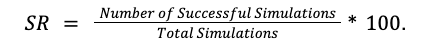

- **Convergence Speed** – Evaluates how quickly our Q-learning model reaches the success state compared to the Monte Carlo baseline. This is determined by tracking the number of time steps required to reduce the tumor size to zero.

- **Q-Table Analysis** – Examines the learned Q-values by averaging the values for each action in the Q-table, providing insights into decision-making patterns and policy optimization.


# Results

## Section 1: Single Episode Performance

After obtaining both our MC policy and Q-learning policy we would generate an episode with initiation of 150 cancer cells and evaluate how well each policy performed. Each graph will show the discretized tumor size over time.

Below is the graph we have obtained from the Monte Carlo simulation and also the Q-learning simulation

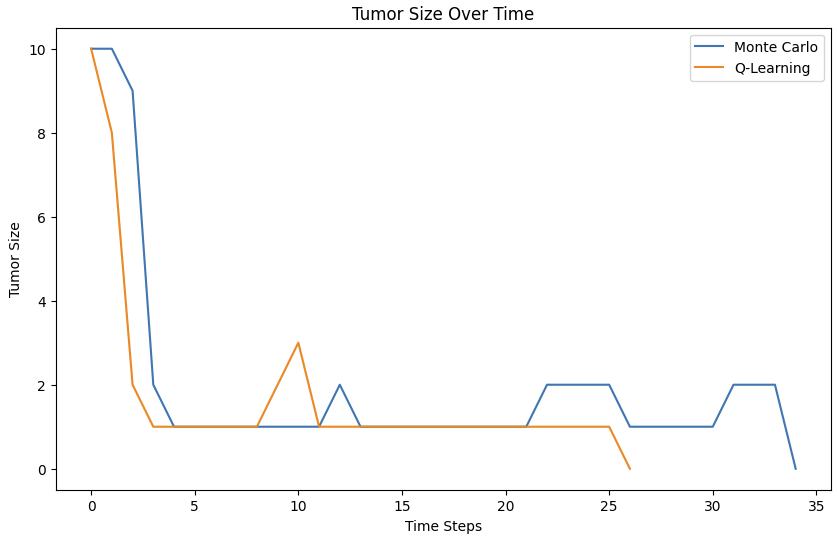

As shown in the graph, there is a drastic decrease in tumor size, reaching a size of 1 at time = 4 for the Monte Carlo policy. The tumor size remains stable until time = 30, after which there is a slight increase before all tumor cells are eliminated at time = 35. For the Q-learning policy, the tumor decreases at approximately the same rate as in the Monte Carlo policy. However, the key difference is that the Q-learning policy reaches the success state faster, achieving it at time = 25, whereas the Monte Carlo policy reaches it at time = 35. This represents a significant reduction in the number of time steps.



#Section 2: Success Rate of Each Policy Over 1000 Episodes
Next, we generated 1000 episodes, each starting with 150 cancer cells, and ran them using the Monte Carlo policy. We then generated another 1000 episodes using the Q-learning policy. Our goal was to evaluate how many episodes successfully reached a tumor size of zero.

We use the following code to determine the number of successful episodes:


In [ ]:
def success_rate_of_policy(Q_table, num_episodes, n_cancer_cells):
    success_count = 0
    for episode in tqdm(range(num_episodes), desc="Running Simulation", unit="episode"):
        state = initialize_state(n_cancer_cells)
        tumor_size = [state['Number of Cancer Cells']]
        while True:
            discrete_state = discretize_state(state)
            action_index = np.argmax(Q_table[discrete_state])
            action = action_space[action_index]
            next_state = state_transitions(state, action)
            tumor_size.append(next_state['Number of Cancer Cells'])
            if next_state['Number of Cancer Cells'] == 0:
                success_count += 1
                break
            if next_state['Number of Cancer Cells'] >= 5000000:
                break
            if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] <= 1e-6:
                break
            if state['CD8 Count'] + state['M1 Count'] + state['NK Count'] >= 19000:
                break
            state = next_state
    return success_count / num_episodes

The results are quite shocking but somewhat expected. For Monte Carlo we got a success rate of 29.2% whereas with q-learning we got a success rate of 49.1% a 19.9% increase. As expected q-learning outperformed the Monte Carlo policy as q-learning updates the policy after each action whereas Monte Carlo has a run a full episode before doing so.

## Section 3: Q-table analysis

Now let us take a look at our q_tables. For our q-tables we will both look at the max values for each action, and the mean value for each action. Below is the analysis for the Monte Carlo q-table:

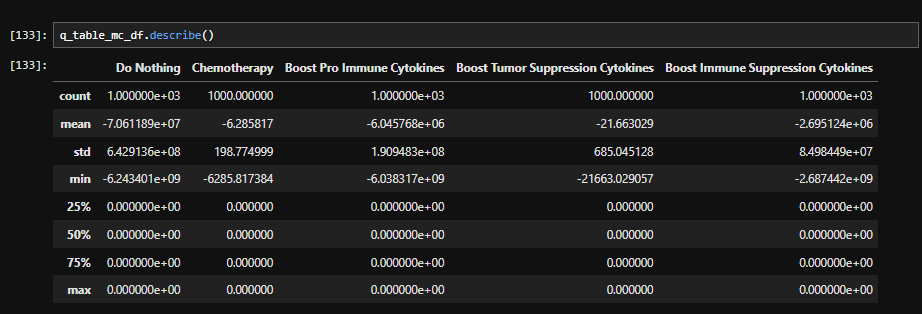

For our Monte Carlo q-table, we see that we do not reach any positive rewards rather we only have negative rewards. But the magnitude drastically differs. Here we see that according to the means, chemotherapy performs the best followed by boosting tumor supression cytokines, boosting immune suppression cytokines, boosting pro immune cytokines, then doing nothing. Looking that this q-table it is clear why we have a smaller success rate than that of q-learning, that because we never achieve true postitive q values.

Below is the analysis for the q-learning q-table:

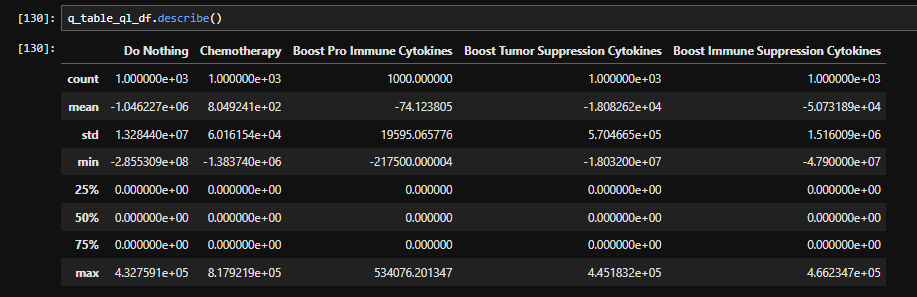

Here we see that Chemotherapy is the one action that will lead to a mean net positive reward, while the rest are net negative rewards. We notice that doing nothing leads to the least amount of reward, and that boosting pro immune cytokines performs fairly well despite the fact that it is still a negative reward. Overall, it is shown in our q-learning q table that chemotherapy is the best action that we can take.

In comparison to that of Monte Carlo, this q-table supports why Q-learning outperforms Monte Carlo. In Q learning we have drastically postive values for chemotherapy indicating that it is truely the best course of action, whereas in Monte Carlo, chemotherapy is still the best option however all rewards have proven to be negative even that of chemotherapy. Becuase Chemotherapy is the clear best option for Q-learning, it will tend to repeat this action and as a result we will have a higher success rate as depicted in section 2.

# Discussion

Our study demonstrates that reinforcement learning, specifically Q-learning, offers significant advantages in optimizing treatment strategies for tumor microenvironments compared to traditional Monte Carlo methods. The key findings from our analysis include the following:  

1. **Chemotherapy is the most effective treatment**  
   Our results indicate that chemotherapy consistently leads to the highest tumor reduction, with Q-learning reinforcing this action as the optimal choice. While chemotherapy has known risks, our model prioritizes it because it yields the highest positive reward in Q-tables, indicating a higher probability of achieving complete tumor elimination.  

2. **Boosting pro-immune cytokines provides some benefits but remains suboptimal**  
   Compared to other treatment strategies, increasing pro-immune cytokines showed better performance, but its overall reward remained negative in both Monte Carlo and Q-learning policies. This suggests that while immune stimulation aids in tumor suppression, it is insufficient as a standalone treatment.  

3. **Boosting immune suppression and tumor suppression cytokines are ineffective**  
   Our analysis revealed that both immune suppression and tumor suppression cytokine therapies performed similarly to taking no action at all. The Q-values assigned to these actions were near zero or negative, reinforcing that these strategies do not significantly contribute to tumor reduction and may even hinder the immune system’s ability to fight cancer.  

4. **Q-learning outperforms Monte Carlo in success rate and convergence speed**  
   Our model achieved a 49.1% success rate with Q-learning compared to 29.2% with Monte Carlo, highlighting the advantage of updating the policy after each action rather than waiting until the end of an episode. Additionally, Q-learning reached the success state 10 time steps faster on average, demonstrating its efficiency in identifying effective treatment sequences.  

These results emphasize the importance of reinforcement learning in medical decision-making and the potential for AI-driven models to refine cancer treatment strategies. While chemotherapy remains the best option in our simulation, future studies could explore ways to improve immune-based therapies and further optimize treatment combinations.

### Reflection and Limitations

While our model was effect at modeling the effects of treatments within the tumor microenvironment, there may have been some room for improvement:


*   While decent, having a state space size of 1000 may be insufficient to fully represent the complexity of a real-world tumor microenvironment, which could involve far more variables.
*   Additonally, the reward function plays a significant role in shaping the policy. If the rewards were not perfectly calibrated to reflect the biological consequences of different treatments, the policy may favor suboptimal actions.
* Furthermore, cancer and tumor microenvironments are very complex and there may be other variables that could change the risk or possible benefits of certain treatment options on a patient to patient basis
* In addition the number of parameters that go into creating a real tumor microenvironment is very extensive. Though the data may be available to create this microenvironment, we would be limited extensively by our compute power

Overall, this project demonstrated the potential of using MDPs and Monte Carlo simulation to model complex biological environments, providing insight into how different treatment strategies may influence a tumor microenvironment.

### Future work
Developing a realistic tumor microenvironment was the most challenging aspect of this project. Our current model simplifies tumor proliferation by considering only three immune cell types (CD8 T-cells, M1 Macrophages, and NK cells), but future work should expand this to include additional immune cells for a more comprehensive representation. Similarly, our action space is limited to a few treatment strategies, while real-world cancer therapies involve a variety of approaches. Additionally, tumors interact not only with immune cells but also with surrounding organs and normal tissue. Cellular properties like adhesion (how cells stick together) and motility (cell movement) also influence tumor behavior and should be incorporated into future models.

### Ethics and Privacy
In our project, we have carefully considered the ethical concerns that may arise from our simulation of the tumor microenvironment. These concerns include:

 1. **Data Privacy & Security**
- Our project relies on clinical datasets that may contain sensitive patient health information.
- While our data may be anonymized, the combination of multiple datasets can increase the risk of **re-identification**, leading to potential privacy violations.
- We will strictly adhere to **data privacy regulations** such as **HIPAA** and **GDPR** and follow best practices in secure data handling.

 2. **Bias in Data & Model Fairness**
- The data we use may not be **representative of diverse populations**, potentially leading to biased treatment suggestions.
- **Genetic and immune responses** vary across demographic populations. If certain groups are underrepresented, our model may provide **ineffective or even discriminatory** treatment suggestions.

 3. **Ethical Use of AI in Medicine**
- AI-driven treatment suggestions may reduce **human oversight**, increasing the risk of **misdiagnosis** or severe complications.
- **Over-reliance on AI** could lead to diminished physician supervision, which is critical for accurate patient care.

 4. **Transparency**
- We will **explicitly present** all limitations, biases, and ethical concerns related to our model and dataset.
- Open discussion of these limitations will help ensure **responsible use** of our model.

 5. **Improper Use & Misinterpretation of the Model**
- Our simulation **simplifies** complex tumor environments, meaning it cannot **fully capture** real-world biological variations.
- Misuse of our model could lead to **false reassurance** about a given treatment plan, disregarding **patient-to-patient variability**.

6. **Accessibility & Healthcare Disparities**
- AI-based cancer treatment solutions may only be accessible to **well-funded healthcare institutions**, further reinforcing **existing disparities** in healthcare.
- We will strive to consider **equitable access** when developing and deploying our model.

### Conclusion
This project explored the use of AI to model complex biological environments, specifically a tumor microenvironment, using a Markov Decision Process (MDP) and Monte Carlo simulations. By simulating treatment strategies such as chemotherapy, boosting pro-immune cytokines, and boosting tumor suppression cytokines, we aimed to evaluate their effects on tumor progression and immune system stability.

Our findings indicate that chemotherapy was the most effective treatment, followed by pro-immune cytokine therapy, while immune suppression and tumor suppression cytokine therapies showed minimal benefits. Q-learning outperformed Monte Carlo, demonstrating faster convergence and a higher success rate in reducing tumor size.  Despite these successes, our model has limitations. The simplified state space may not fully capture the complexity of real-world tumor environments, and the reward function could be further refined to improve decision-making accuracy. Additionally, the computational constraints limited our ability to incorporate more variables.

Overall, this study highlights the potential of reinforcement learning in optimizing cancer treatment strategies. While not a substitute for clinical decision-making, AI-driven models like ours can provide valuable insights for future research in personalized medicine and treatment planning.



**Note**: For full coding scripts please refer to the Final_State_Action_Transition_Buildout.ipynb notebook inside the Github repo

# Footnotes

1. **NCI Dictionary of Cancer Terms**.  
   *Comprehensive Cancer Information - NCI*.  
   [www.cancer.gov/publications/dictionaries/cancer-terms/def/tumor-microenvironment](https://www.cancer.gov/publications/dictionaries/cancer-terms/def/tumor-microenvironment)  
   *Accessed 13 Feb. 2025.*

2. **Reyes-Aldasoro, Constantino Carlos**.  
   *"Modelling the Tumour Microenvironment, but What Exactly Do We Mean by ‘Model’?"*  
   *Cancers, U.S. National Library of Medicine*, 26 July 2023.  
   [PMC10416922](https://pmc.ncbi.nlm.nih.gov/articles/PMC10416922/)

3. **Ahmed, Hossain, et al.**  
   *"Role of T Cells in Cancer Immunotherapy: Opportunities and Challenges."*  
   *Cancer Pathogenesis and Therapy, U.S. National Library of Medicine*, 20 Dec. 2022.  
   [PMC10846312](https://pmc.ncbi.nlm.nih.gov/articles/PMC10846312/)

4. **Dennis, Kristen L, et al.**  
   *"Current Status of Interleukin-10 and Regulatory T-Cells in Cancer."*  
   *Current Opinion in Oncology, U.S. National Library of Medicine*, Nov. 2013.  
   [PMC4322764](https://pmc.ncbi.nlm.nih.gov/articles/PMC4322764/)

